In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import numpy as np

C:\Users\USER-64\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [4]:
cidades_zul = pd.read_csv('cidades_zul.csv').drop(columns=['kpi'])


In [5]:
cidades_zul['day'] = pd.to_datetime(cidades_zul['day'])
cidades_zul = cidades_zul[['day', 'percentualDifference']]


# Calcula quantas linhas devem ser mantidas (múltiplo de 7)
num_rows = len(cidades_zul)
complete_weeks = num_rows // 5  # parte inteira
rows_to_keep = complete_weeks * 5

# Mantém apenas semanas completas
cidades_zul = cidades_zul.iloc[:rows_to_keep]


cidades_zul.head()

,day,percentualDifference
0,2025-03-03,-26.17
1,2025-03-04,-24.29
2,2025-03-05,-20.35
3,2025-03-06,-0.75
4,2025-03-07,-1.30


In [6]:
print(cidades_zul['day'].dtypes)
cidades_zul.columns = ['ds','y']

datetime64[ns]


In [7]:
train = cidades_zul[:-5]
test = cidades_zul[-5:]

model = Prophet()
model.fit(train)

03:16:02 - cmdstanpy - INFO - Chain [1] start processing
03:16:03 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
test.head(10)

,ds,y
70,2025-06-09,14.31
71,2025-06-10,13.63
72,2025-06-11,18.53
73,2025-06-12,10.85
74,2025-06-13,6.90


In [9]:
print(train.tail(1))

           ds     y
69 2025-06-06  4.24


In [10]:
future = model.make_future_dataframe(periods=7, freq='B')
forecast = model.predict(future)

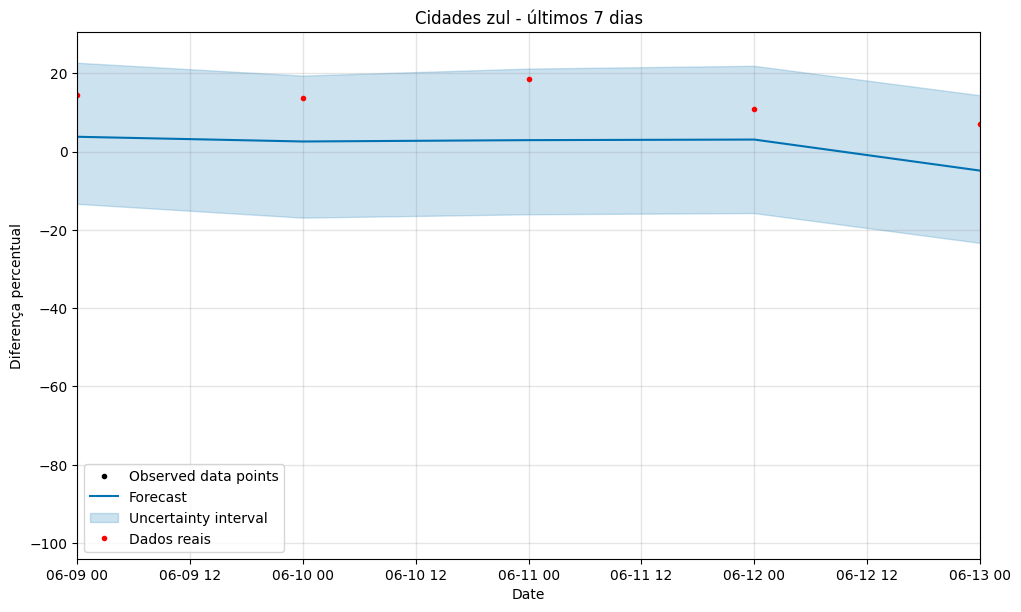

In [11]:
# Gera o gráfico da previsão completa
fig = model.plot(forecast, xlabel='Date', ylabel='Diferença percentual')

# Define o intervalo do eixo x para mostrar apenas os últimos 7 dias
start_date = test['ds'].min()
end_date = test['ds'].max()
plt.xlim(start_date, end_date)

# Adiciona os pontos reais do teste
plt.plot(test['ds'], test['y'], 'r.', label='Dados reais')  # pontos vermelhos

# Título e legenda
plt.title('Cidades zul - últimos 7 dias')
plt.legend()
plt.show()

Atualização do modelo

In [ ]:
# daremos ao Prophet uma inicialização rápida , 
# passando os parâmetros do modelo de ontem para inicialização. 
# Primeiro, precisamos definir uma classe para formatar esses parâmetros corretamente

class StanInit:
    def __init__(self, model):
        self.params = {
            'k': np.mean(model.params['k']),
            'm': np.mean(model.params['m']),
            'sigma_obs': \
            np.mean(model.params['sigma_obs']),
            'delta': np.mean(model.params['delta'],
                            axis=0),
            'beta': np.mean(model.params['beta'], axis=0)
        }
    def __call__(self):
        return self.params

# Estou apenas adicionando novos dados ao modelo
cidades_zul_ontem = cidades_zul[cidades_zul['ds'] < cidades_zul['ds'].max()]
model1 = Prophet().fit(cidades_zul_ontem)

model2 = Prophet().fit(
    cidades_zul,
    inits=StanInit(model1)())

03:26:42 - cmdstanpy - INFO - Chain [1] start processing
03:26:43 - cmdstanpy - INFO - Chain [1] done processing
03:26:43 - cmdstanpy - INFO - Chain [1] start processing
03:26:43 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
from prophet.plot import (
    plot_plotly,
    plot_components_plotly,
    plot_forecast_component_plotly,
    plot_seasonality_plotly
)

In [15]:
fig = plot_plotly(model2, forecast, trend=True)
py.iplot(fig)

NameError: name 'go' is not defined